# Amazon Reviews Sentiment Analysis Project

The below project code performs sentiment analysis on Amazon reviews dataset (kaggle dataset) using the VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool. 

## Load the dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


## Select required columns from the dataset

In [2]:
finaldf = df[['overall','reviewText']]

In [3]:
finaldf

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."
...,...,...
4910,1.0,I bought this Sandisk 16GB Class 10 to use wit...
4911,5.0,Used this for extending the capabilities of my...
4912,5.0,Great card that is very fast and reliable. It ...
4913,5.0,Good amount of space for the stuff I want to d...


## Remove blank records

In [4]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
finaldf.dropna(inplace=True)

blanks = []  # start with an empty list

for i,lb,rv in finaldf.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

finaldf.drop(blanks, inplace=True)

C:\Users\Jugal Deshmukh\AppData\Local\Temp\ipykernel_10168\1829558359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf.dropna(inplace=True)
C:\Users\Jugal Deshmukh\AppData\Local\Temp\ipykernel_10168\1829558359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf.drop(blanks, inplace=True)


In [5]:
finaldf['overall'].value_counts()

5.0    3921
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

## Converting ratings of 5 and  4 to positive,3, 2 and 1 to negative

In [6]:
# Define the replacements
replacements = {
    5.0: "pos",
    4.0: "pos",
    3.0: "neg",
    2.0: "neg",
    1.0: "neg"
}

# Use the map function for efficient replacement
finaldf["overall"] = finaldf["overall"].map(replacements)

C:\Users\Jugal Deshmukh\AppData\Local\Temp\ipykernel_10168\2123763377.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf["overall"] = finaldf["overall"].map(replacements)


In [7]:
finaldf.dtypes

overall       object
reviewText    object
dtype: object

In [8]:
finaldf['overall'].value_counts()

pos    4448
neg     466
Name: overall, dtype: int64

In [9]:
finaldf['overall'].unique()

array(['pos', 'neg'], dtype=object)

## Visualizing the sentiments from the Amazon reviews

In [10]:
import matplotlib.pyplot as plt

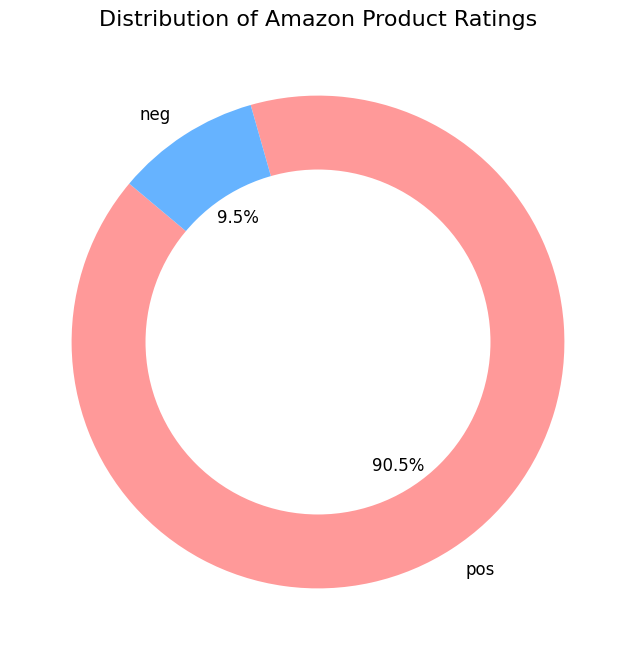

pos    4448
neg     466
Name: overall, dtype: int64

In [11]:
# Assuming df is your DataFrame and it has a column named 'Score'
# Generate the ratings variable from the 'Score' column
ratings = finaldf['overall'].value_counts()

# Extract the rating values and their corresponding counts
numbers = ratings.index.tolist()
quantity = ratings.values.tolist()

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(quantity, labels=numbers, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

# Draw a central circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the title
plt.title('Distribution of Amazon Product Ratings', fontsize=16)

# Display the pie chart
plt.show()

# Return the value counts
ratings

## Import `SentimentIntensityAnalyzer` and create an sid object
This assumes that the VADER lexicon has been downloaded.

In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Jugal
[nltk_data]     Deshmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Use sid to append a `comp_score` to the dataset

In [13]:
finaldf['scores'] = finaldf['reviewText'].apply(lambda reviewText: sid.polarity_scores(reviewText))

finaldf['compound']  = finaldf['scores'].apply(lambda score_dict: score_dict['compound'])

finaldf['comp_score'] = finaldf['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

finaldf.head()

C:\Users\Jugal Deshmukh\AppData\Local\Temp\ipykernel_10168\3408792306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['scores'] = finaldf['reviewText'].apply(lambda reviewText: sid.polarity_scores(reviewText))
C:\Users\Jugal Deshmukh\AppData\Local\Temp\ipykernel_10168\3408792306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['compound']  = finaldf['scores'].apply(lambda score_dict: score_dict['compound'])
C:\Users\Jugal Deshmukh\AppData\Local\Temp\ipykernel_10168\3408792306.py:5: Se

,overall,reviewText,scores,compound,comp_score
0,pos,No issues.,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.2960,neg
1,pos,"Purchased this for my device, it worked as adv...","{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...",-0.2960,neg
2,pos,it works as expected. I should have sprung for...,"{'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'comp...",-0.3089,neg
3,pos,This think has worked out great.Had a diff. br...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.7081,pos
4,pos,"Bought it with Retail Packaging, arrived legit...","{'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'co...",0.7087,pos


## Performance comparison analysis between the original `overall` and `comp_score`

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
accuracy_score(finaldf['overall'],finaldf['comp_score'])

0.827024827024827

In [16]:
print(classification_report(finaldf['overall'],finaldf['comp_score']))

              precision    recall  f1-score   support

         neg       0.28      0.53      0.37       466
         pos       0.95      0.86      0.90      4448

    accuracy                           0.83      4914
   macro avg       0.61      0.69      0.63      4914
weighted avg       0.88      0.83      0.85      4914



### Confusion Matrix points
[[TP_pos, FP_neg] <br>
 [FN_pos, TN_neg]] <br>
TP_pos: Number of reviews correctly predicted as "pos".<br>
FP_neg: Number of reviews incorrectly predicted as "pos" when they are actually "neg". <br>
FN_pos: Number of reviews incorrectly predicted as "neg" when they are actually "pos". <br>
TN_neg: Number of reviews correctly predicted as "neg". <br>

In [17]:
print(confusion_matrix(finaldf['overall'],finaldf['comp_score']))

[[ 245  221]
 [ 629 3819]]


In [18]:
#filename ="finaldata.xlsx"

In [19]:
#finaldf.to_excel(filename)

## Project Outcome and Conclusion 

The project provides a comprehensive framework for sentiment analysis of Amazon reviews using VADER, offering insights into customer sentiment towards products based on textual reviews. The outcome includes actionable insights such as:

1. Identification of positive and negative sentiments associated with products. <br>
2. Evaluation of model performance using standard metrics to guide improvements. <br>
3. Potential next steps could involve:  <br>
Experimenting with different sentiment analysis tools or models to improve accuracy.<br>
Incorporating additional features or data sources to enrich analysis (e.g., metadata, user profiles).  <br>
Fine-tuning parameters or thresholds for sentiment classification based on specific project requirements or domain characteristics.<br>

Overall, the final outcome of the project serves as a valuable tool for understanding customer sentiment and making informed decisions related to product management, marketing strategies, and customer satisfaction enhancement in an e-commerce context.